In [1]:
# Reduce loading of auto fill for jupyter lab
%config Completer.use_jedi = False

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [90]:
# Matplotlib settings

# Make matplotlib images appear inline in code
%matplotlib inline

# Lettering format
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 16})

In [3]:
def figure_elements(size_x, size_y,
                    title=None, x_label=None, y_label=None):
    
    fig, ax = plt.subplots()
    
    # Set figure size
    fig.set_size_inches(size_x, size_y)
    
    # set a title and labels
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    return(fig, ax)

In [4]:
covid_data = pd.read_csv('data/covid_data.csv', index_col=0)

In [5]:
chess_games = pd.read_csv('data/games.csv', index_col=0)

In [6]:
covid_curr = covid_data[(covid_data['date'] == '2020-05-19') &
                        (~covid_data['continent'].isna()) &
                        (covid_data['new_deaths_per_million'] > 0)]

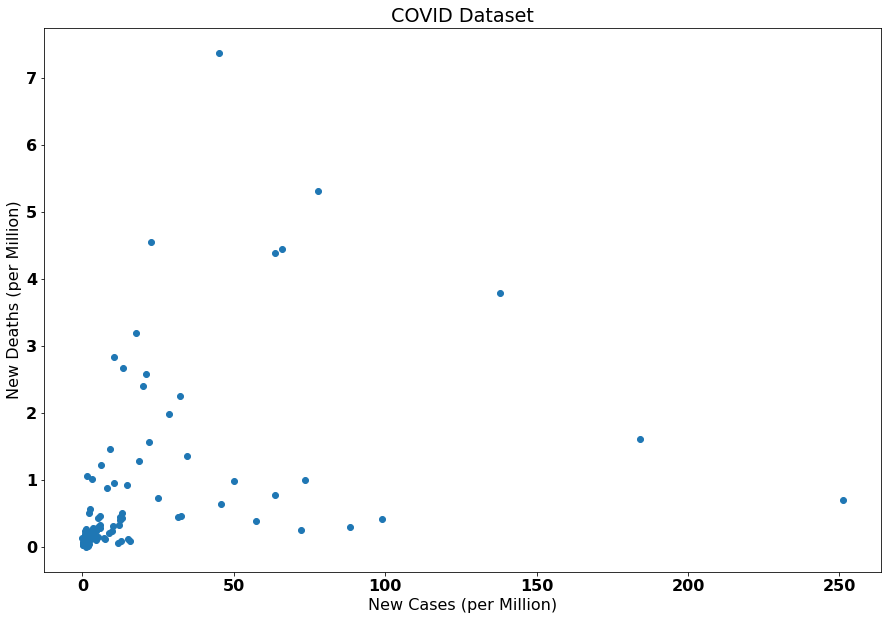

In [91]:
fig, ax = figure_elements(15, 10, 'COVID Dataset', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)')

ax.scatter(covid_curr['new_cases_per_million'], covid_curr['new_deaths_per_million'])

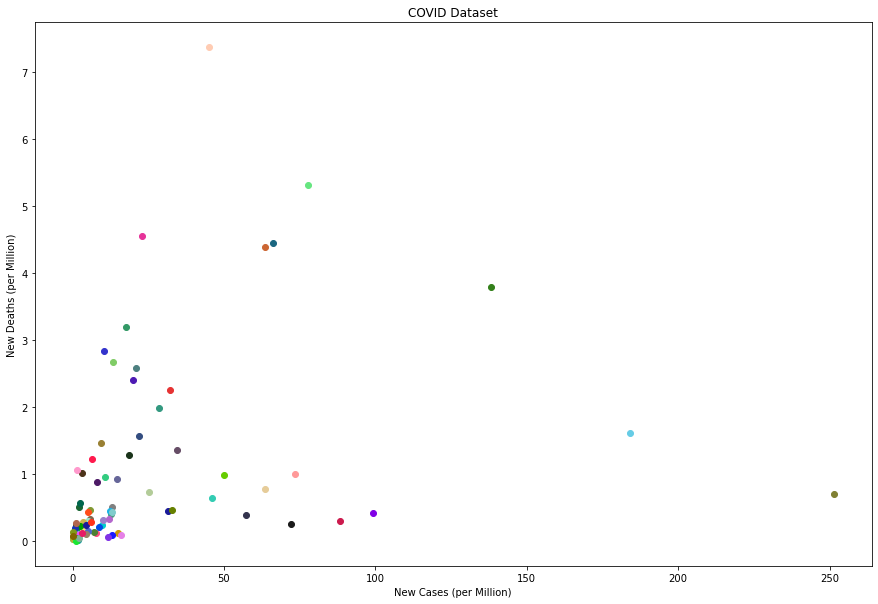

In [8]:
fig, ax = figure_elements(15, 10, 'COVID Dataset', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)')

# plot each data-point
# with a randomly generated RGB colour
for i in range(len(covid_curr['location'])):
    ax.scatter(covid_curr['new_cases_per_million'][i],
               covid_curr['new_deaths_per_million'][i],
               color=np.random.rand(3,).round(1))

In [9]:
covid_to_date = covid_data[(covid_data['location'] == 'United Kingdom') &
                           (~covid_data['continent'].isna()) &
                           (covid_data['new_deaths_per_million'] > 0)]

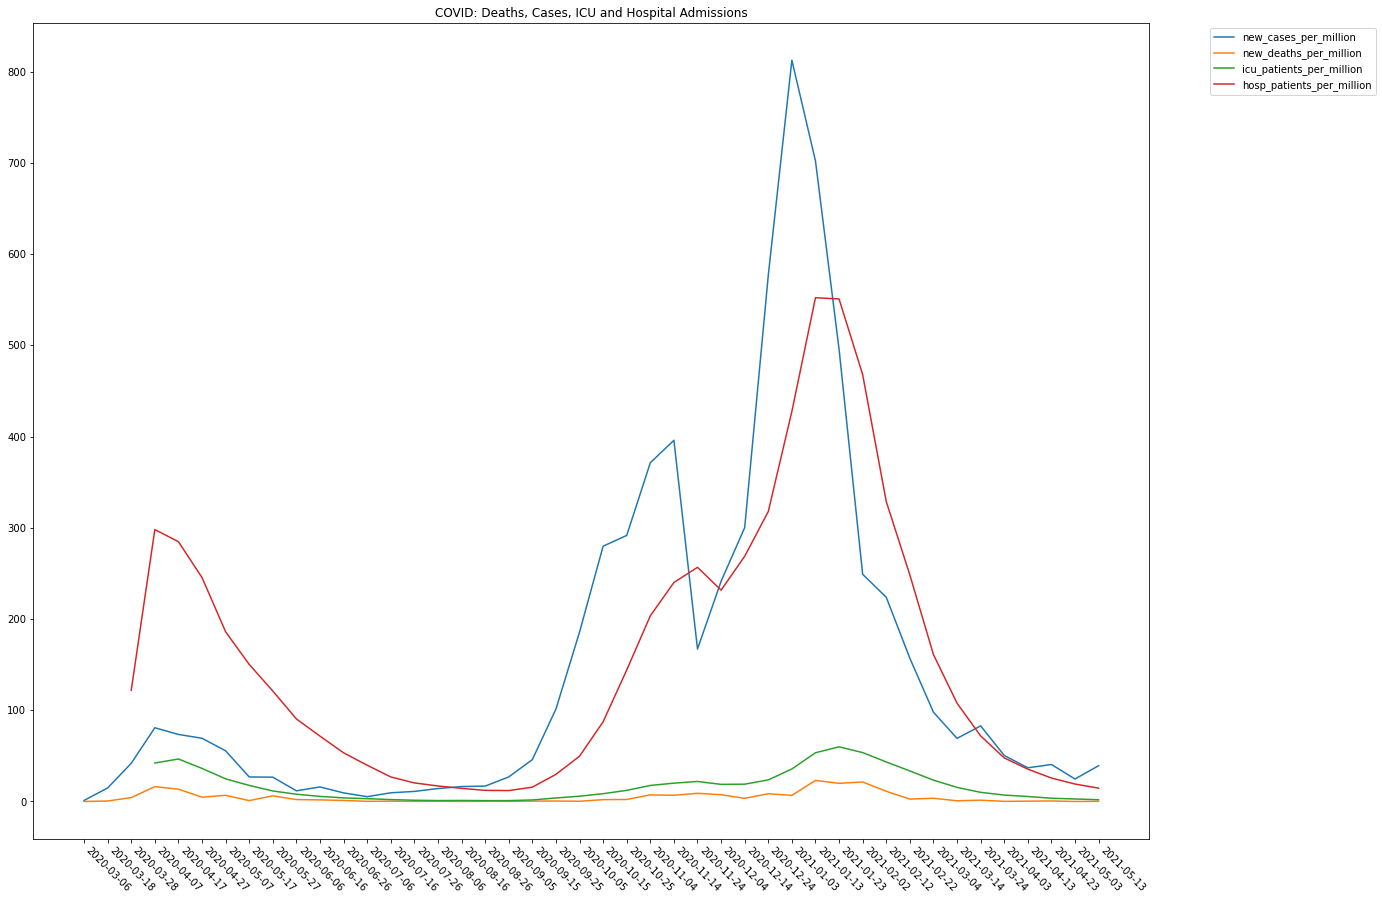

In [10]:
# get columns to plot
columns = ['new_cases_per_million',
           'new_deaths_per_million',
           'icu_patients_per_million',
           'hosp_patients_per_million']

# create x data
x_data = covid_to_date['date'].values[0::10]

fig, ax = figure_elements(20, 15, 'COVID: Deaths, Cases, ICU and Hospital Admissions')

# plot each column
for column in columns:
    ax.plot(x_data, covid_to_date[column][0::10], label=column)
    
# set title and legend
plt.xticks(rotation=-45, ha='left')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

In [11]:
high_rated = chess_games[(chess_games['rated'] == True) &
                         (chess_games['black_rating'] > 2000) &
                         (chess_games['white_rating'] > 2000)]

(array([ 94., 336., 203.,  87.,  28.,   7.,   2.,   0.,   0.,   2.]),
 array([  2. ,  36.7,  71.4, 106.1, 140.8, 175.5, 210.2, 244.9, 279.6,
        314.3, 349. ]),
 <BarContainer object of 10 artists>)

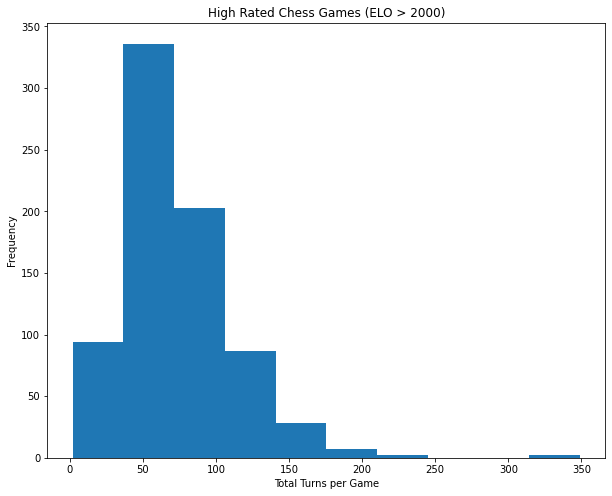

In [12]:
fig, ax = figure_elements(10, 8,
                         'High Rated Chess Games (ELO > 2000)',
                         'Total Turns per Game',
                         'Frequency')

# plot histogram
ax.hist(high_rated['turns'])

In [13]:
high_rated.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [61]:
openings = high_rated['opening_name'].value_counts()
top_openings = openings[openings > 4].sort_index()

<ipython-input-71-b979ea3fafc3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(points, rotation=-45, ha='left')


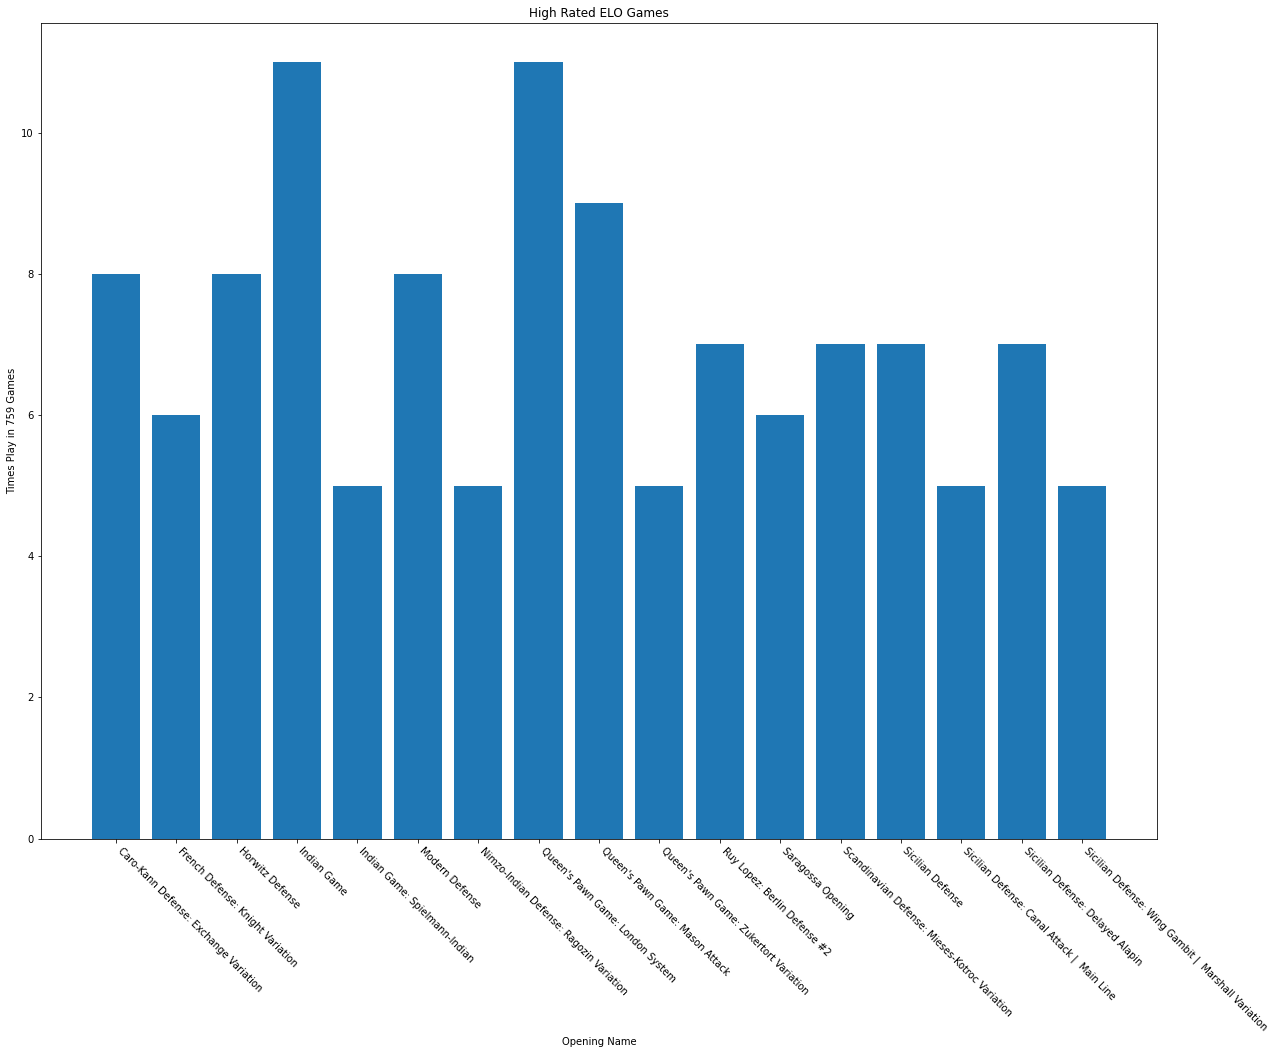

In [71]:
fig, ax = figure_elements(20, 15, 'High Rated ELO Games',
                          'Opening Name',
                          f'Times Play in {len(high_rated)} Games')

# get x and y data
points = top_openings.index
frequency = top_openings.values

# create bar chart
ax.bar(points, frequency)

ax.set_xticklabels(points, rotation=-45, ha='left')

plt.show()

In [19]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

NameError: name 'iris' is not defined

In [ ]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

In [ ]:
wine_reviews['points'].plot.hist()

In [ ]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

In [ ]:
wine_reviews.groupby('country').price.mean().sort_values(ascending=False)[:5].plot.bar()

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

In [ ]:
sns.histplot(wine_reviews['points'], bins=10, kde=False)

In [ ]:
sns.histplot(wine_reviews['points'], bins=10, kde=True)

In [ ]:
sns.countplot(x=wine_reviews['points'])

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot(x='points', y='price', data=df)

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

In [ ]:
sns.heatmap(iris.corr(), annot=True)

In [ ]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

In [ ]:
sns.pairplot(iris)

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

In [ ]:
covid_ons = pd.read_excel('./data/datadownload.xlsx')

In [ ]:
covid_ons.dropna(how='all', inplace=True)
covid_ons.dropna(how='any', axis=0, inplace=True)

In [ ]:
covid_ons

In [ ]:
fig, ax = figure_elements(15, 10)

cov19_deaths = covid_ons[covid_ons['Year'] == 2021]['Deaths due to COVID-19']
flu_deaths = covid_ons[covid_ons['Year'] == 2021]['Deaths due to Influenza and Pneumonia']
week_no = covid_ons[covid_ons['Year'] == 2021]['Week no.']

values = [cov19_deaths, flu_deaths]

for i in range(len(values)):
    ax.plot(week_no, values[i])

plt.xticks(rotation=-45, ha='left')
ax.legend(['covid deaths', 'flu deaths'])